In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore') 

In [ ]:
#loading dataset
conn = psycopg2.connect(
    host="your_host",
    database="your_database",
    user="your_username",
    password="your_password",
    port="your_port"
)

In [3]:
#Fetching dataset
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2.0,1.48,0.99,2.0,1.98,0.10,14069.87,0.50,25.252525,1.0,1.337838
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,750,4.99,1.0,3.37,4.99,1.0,4.99,0.11,144929.24,1.62,32.464930,1.0,1.480712
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1500,5.29,1.0,3.57,5.29,1.0,5.29,0.22,15919.70,1.72,32.514178,1.0,1.481793
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,750,6.29,1.0,4.14,5.79,1.0,5.79,0.11,9.46,1.65,28.497409,1.0,1.398551
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,750,5.79,1.0,3.99,5.79,1.0,5.79,0.11,27100.41,1.80,31.088083,1.0,1.451128


In [4]:
#EDA (Exploratory data analysis)


In [5]:
#Summary Statics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
totalquantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalexcisetax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05


In [7]:
#Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

In [8]:
numerical_cols

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'actualPrice',
       'totalquantity', 'totalpurchasedollars', 'totalsalesprice',
       'totalsalesquantity', 'totalsalesdollars', 'totalexcisetax',
       'total_freight', 'Gross_Profit', 'Profimargin', 'StockTurover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

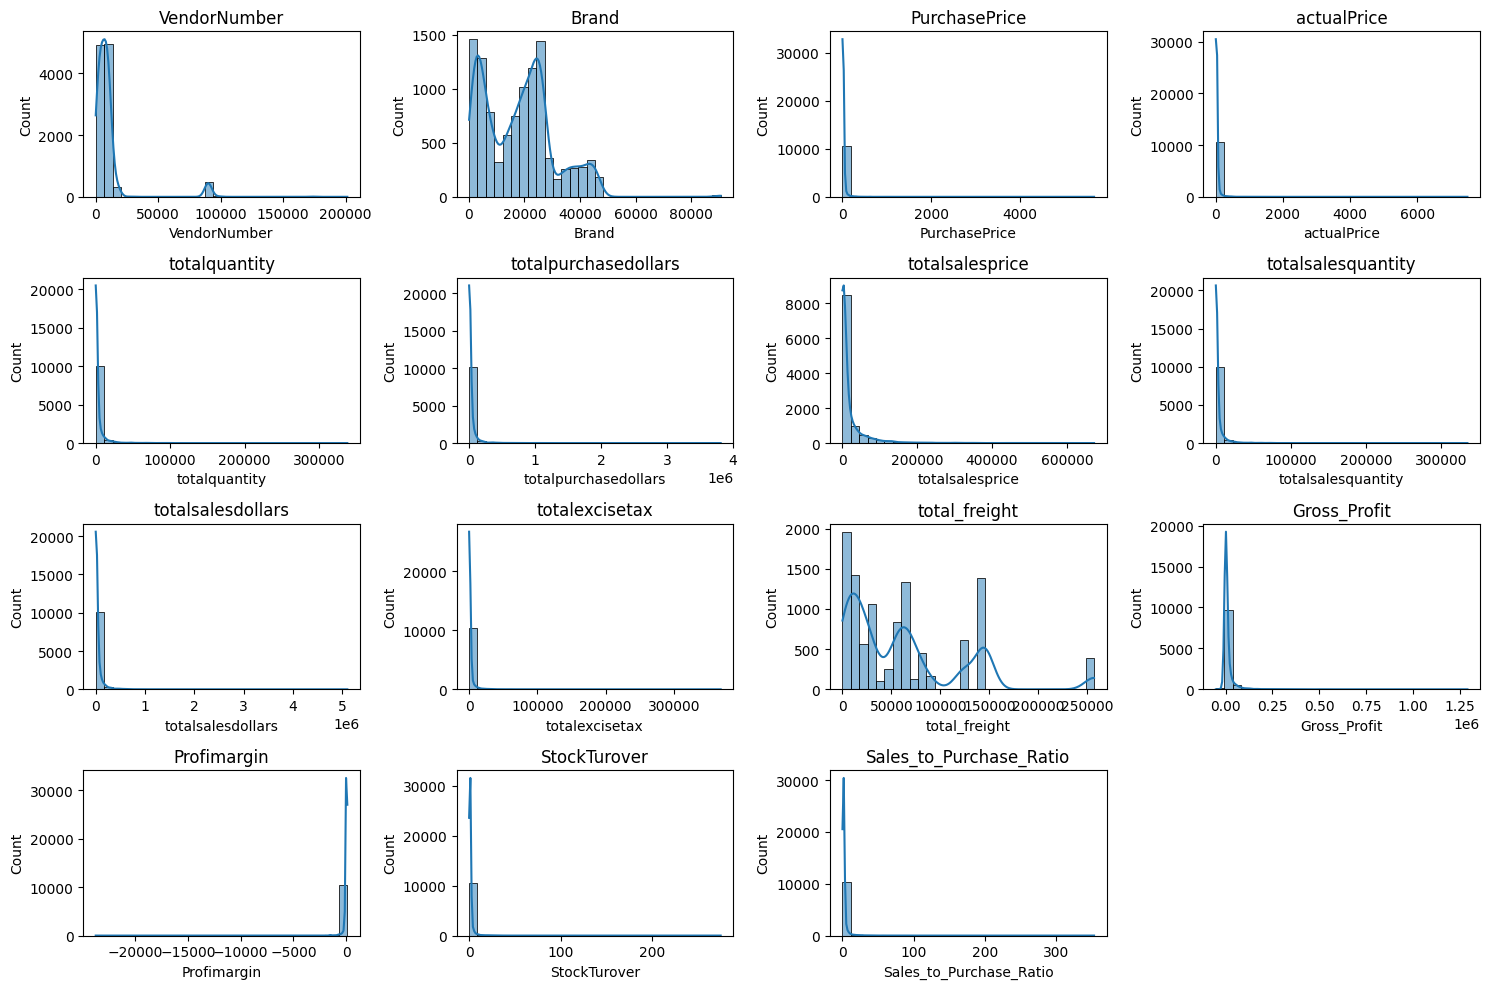

In [9]:

plt.figure(figsize=(15, 10)) 

for i, col in enumerate(numerical_cols):  
    plt.subplot(4, 4, i + 1)              
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(col)                        

plt.tight_layout()                        
plt.show()                                










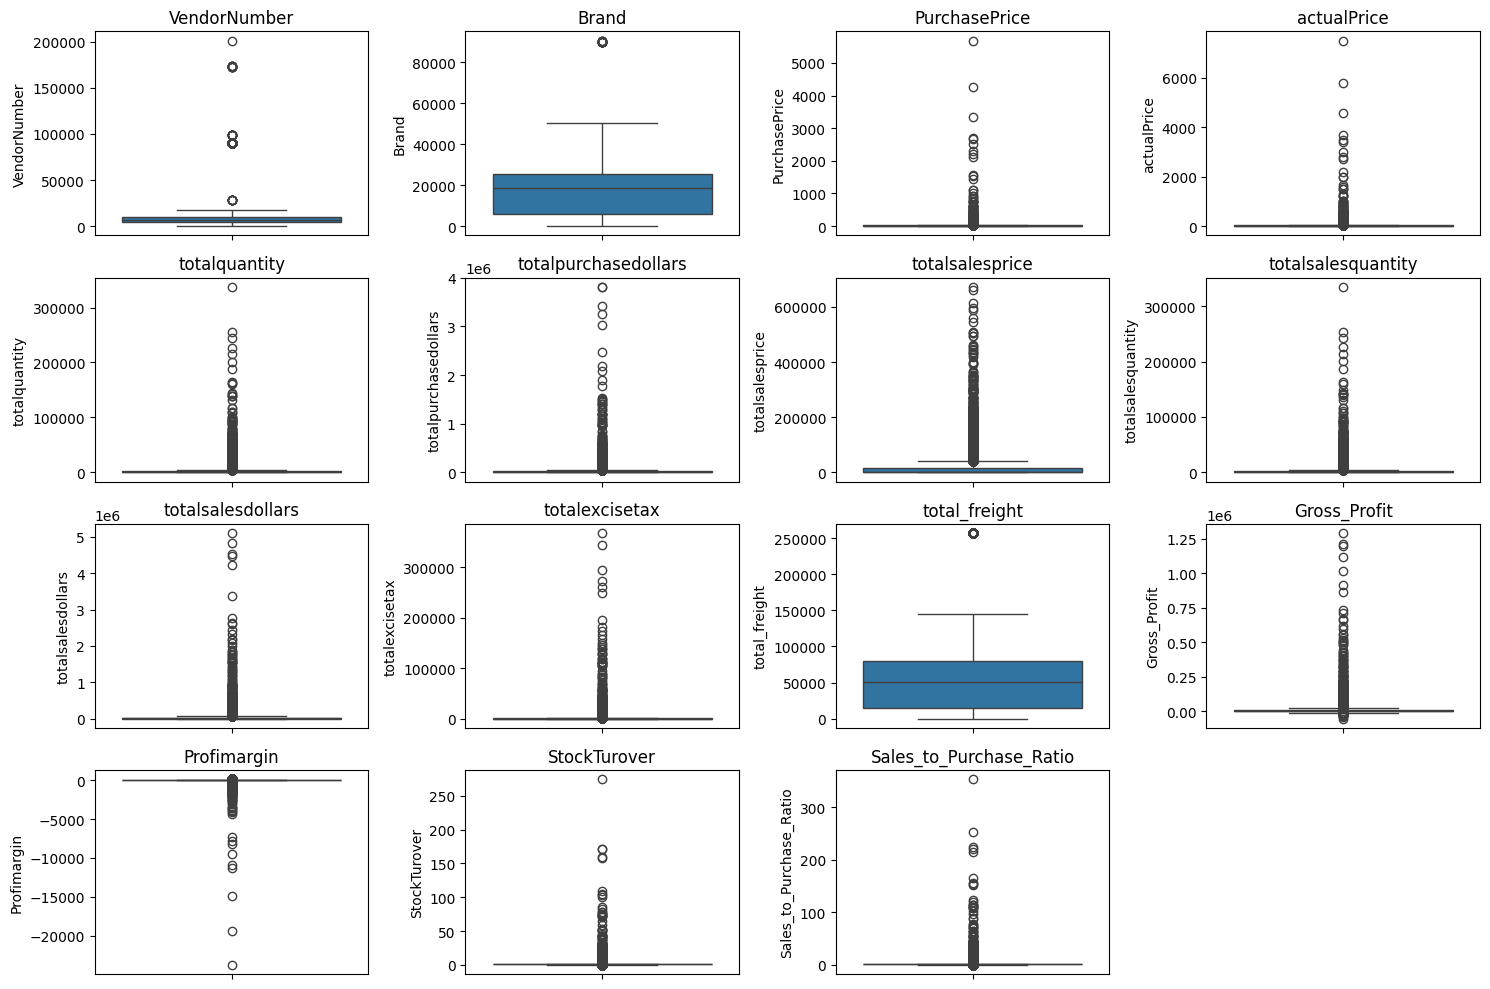

In [10]:
plt.figure(figsize=(15, 10)) 

for i, col in enumerate(numerical_cols):  
    plt.subplot(4, 4, i + 1)              
    sns.boxplot(y = df[col]) 
    plt.title(col)                        

plt.tight_layout()                        
plt.show()    

In [11]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2.0,1.48,0.99,2.0,1.98,0.10,14069.87,0.50,25.252525,1.0,1.337838
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,750,4.99,1.0,3.37,4.99,1.0,4.99,0.11,144929.24,1.62,32.464930,1.0,1.480712
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1500,5.29,1.0,3.57,5.29,1.0,5.29,0.22,15919.70,1.72,32.514178,1.0,1.481793
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,750,6.29,1.0,4.14,5.79,1.0,5.79,0.11,9.46,1.65,28.497409,1.0,1.398551
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,750,5.79,1.0,3.99,5.79,1.0,5.79,0.11,27100.41,1.80,31.088083,1.0,1.451128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9552,M S WALKER INC,27708,Ch Puech-Haut Prestige Langu,12.41,750,18.99,1008.0,12509.28,0.00,0.0,0.00,0.00,55551.82,-12509.28,-inf,0.0,0.000000
10688,7153,PINE STATE TRADING CO,14647,Tierra Divina Malbec,12.92,750,18.99,12.0,155.04,0.00,0.0,0.00,0.00,15884.82,-155.04,-inf,0.0,0.000000
10689,4425,MARTIGNETTI COMPANIES,24525,Tablas Crk Patelin Tblas Ros,14.19,750,21.99,12.0,170.28,0.00,0.0,0.00,0.00,144929.24,-170.28,-inf,0.0,0.000000
10690,7153,PINE STATE TRADING CO,21127,Fire Brix Chard,6.37,750,9.49,18.0,114.66,0.00,0.0,0.00,0.00,15884.82,-114.66,-inf,0.0,0.000000


In [12]:
pd.read_sql_query('SELECT * FROM "vendor_sales_summary" LIMIT 0;', conn).columns


Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [13]:
df = pd.read_sql_query("""
    SELECT * FROM "vendor_sales_summary"
    WHERE "Gross_Profit" > 0
      AND "Profimargin" > 0
      AND "totalsalesquantity" > 0;
""", conn)


In [14]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2.0,1.48,0.99,2.0,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,750,4.99,1.0,3.37,4.99,1.0,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1500,5.29,1.0,3.57,5.29,1.0,5.29,0.22,15919.70,1.72,32.514178,1.000000,1.481793
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,750,6.29,1.0,4.14,5.79,1.0,5.79,0.11,9.46,1.65,28.497409,1.000000,1.398551
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,750,5.79,1.0,3.99,5.79,1.0,5.79,0.11,27100.41,1.80,31.088083,1.000000,1.451128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109.0,3023206.01,545778.28,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682.0,3261197.94,420050.01,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407.0,3418303.68,461140.15,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038.0,3804041.22,561512.37,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


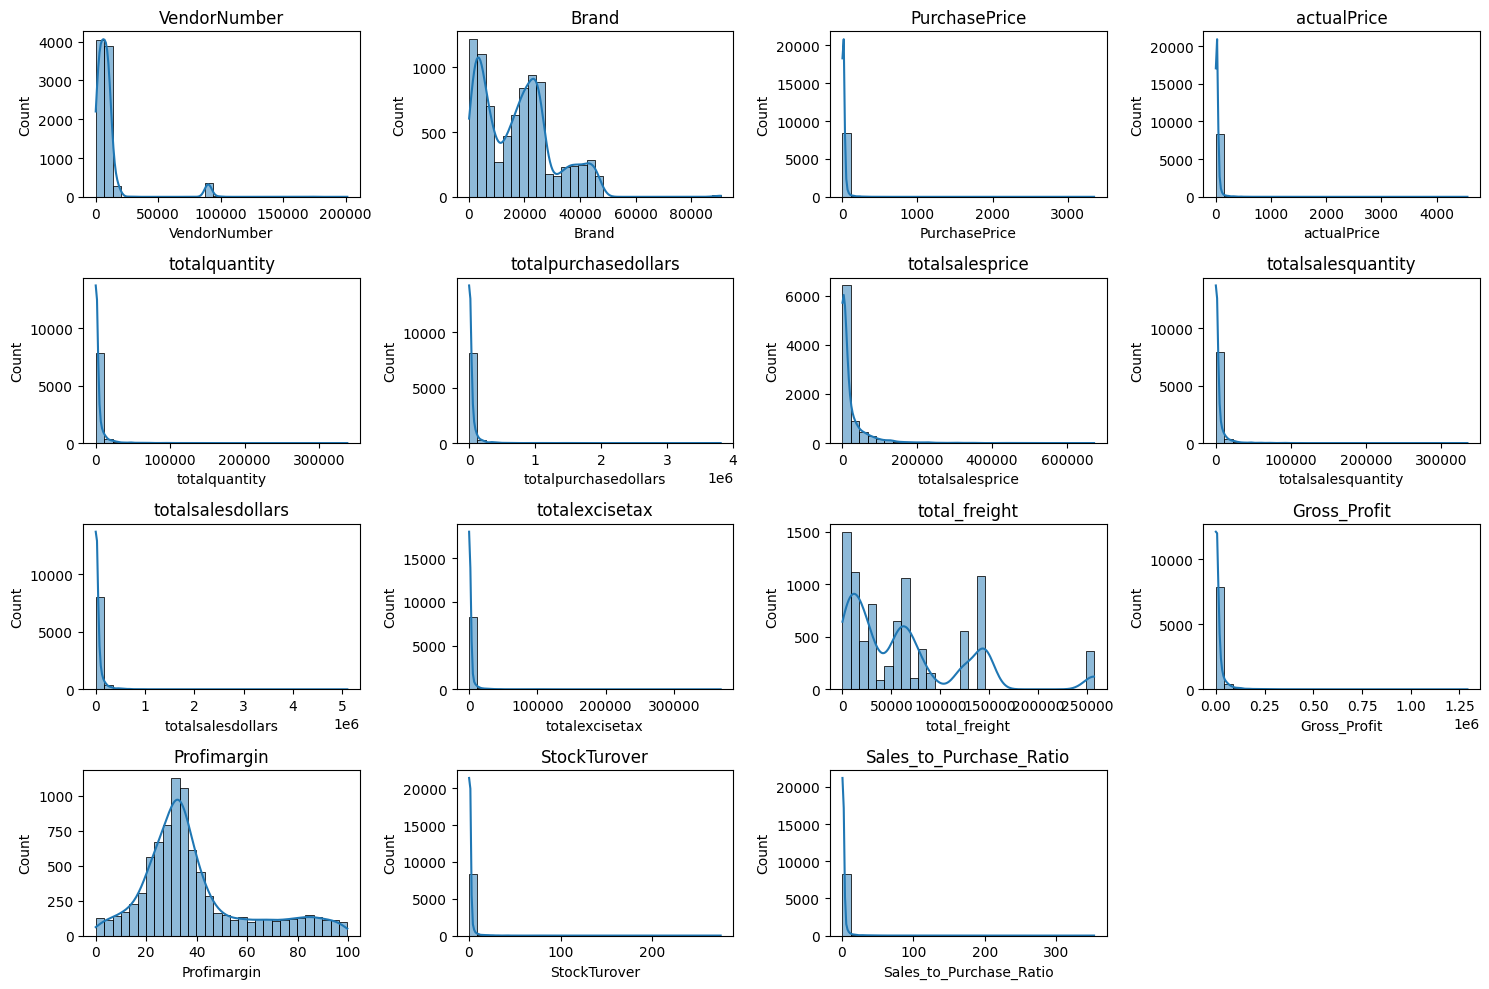

In [15]:
plt.figure(figsize=(15, 10)) 

for i, col in enumerate(numerical_cols):  
    plt.subplot(4, 4, i + 1)              
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(col)                        

plt.tight_layout()                        
plt.show()    

In [16]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

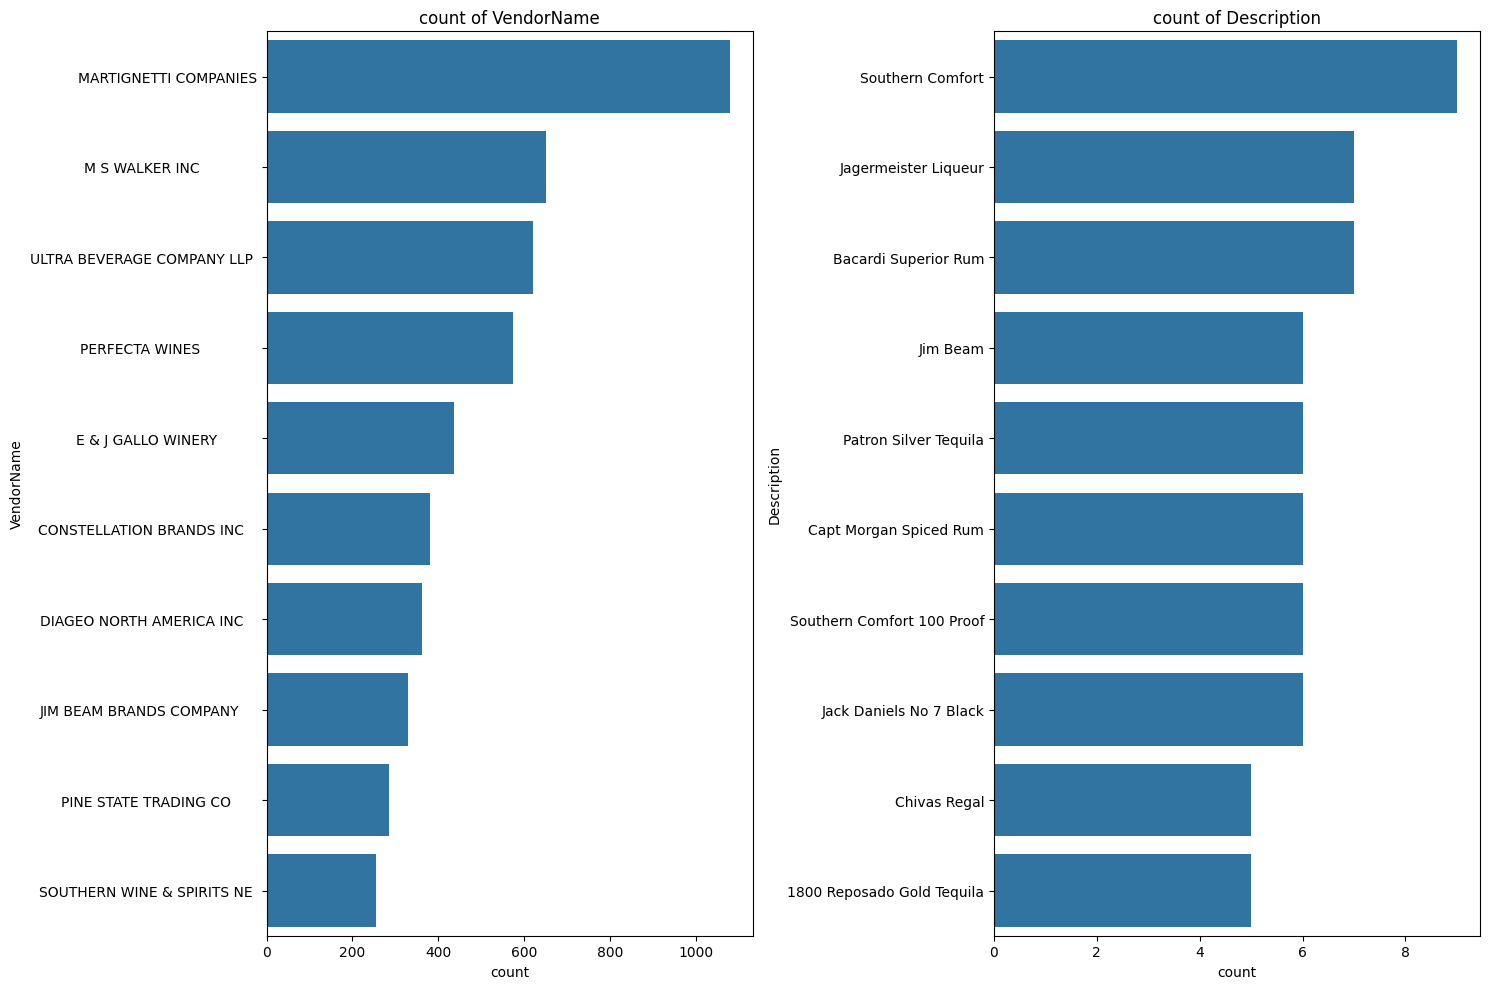

In [17]:
#  Count plots for categoerical variables

Categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(Categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"count of {col}")
plt.tight_layout()
plt.show()

In [18]:
#Correlation

Correlation_matrix = df[numerical_cols].corr()

Correlation_matrix

,VendorNumber,Brand,PurchasePrice,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio
VendorNumber,1.000000,0.080837,-0.018546,-0.017982,-0.059279,-0.047170,-0.074871,-0.059920,-0.050760,-0.033071,-0.214275,-0.058736,-0.018227,-0.004734,-0.003305
Brand,0.080837,1.000000,-0.035829,-0.021102,-0.141124,-0.153734,-0.245188,-0.142383,-0.147284,-0.161722,-0.163922,-0.125213,0.073185,-0.019924,-0.006672
PurchasePrice,-0.018546,-0.035829,1.000000,0.994893,-0.046426,-0.010400,-0.007515,-0.046817,-0.012162,-0.015920,-0.000335,-0.016491,0.038311,0.003121,0.001971
actualPrice,-0.017982,-0.021102,0.994893,1.000000,-0.050446,-0.014014,-0.013432,-0.050847,-0.015528,-0.019230,-0.004514,-0.019080,0.048138,0.003682,0.002986
totalquantity,-0.059279,-0.141124,-0.046426,-0.050446,1.000000,0.673766,0.546461,0.999119,0.685412,0.617506,0.168084,0.694380,-0.121580,-0.047710,-0.049885
totalpurchasedollars,-0.047170,-0.153734,-0.010400,-0.014014,0.673766,1.000000,0.822529,0.671110,0.996734,0.882750,0.152714,0.955625,-0.121235,-0.040866,-0.043491
totalsalesprice,-0.074871,-0.245188,-0.007515,-0.013432,0.546461,0.822529,1.000000,0.543636,0.827065,0.665277,0.197847,0.812376,-0.180082,-0.065556,-0.069362
totalsalesquantity,-0.059920,-0.142383,-0.046817,-0.050847,0.999119,0.671110,0.543636,1.000000,0.683866,0.617109,0.169338,0.695859,-0.111655,-0.043708,-0.046031
totalsalesdollars,-0.050760,-0.147284,-0.012162,-0.015528,0.685412,0.996734,0.827065,0.683866,1.000000,0.873088,0.151665,0.976292,-0.108224,-0.040313,-0.042596
totalexcisetax,-0.033071,-0.161722,-0.015920,-0.019230,0.617506,0.882750,0.665277,0.617109,0.873088,1.000000,0.127892,0.818846,-0.090912,-0.026912,-0.029562


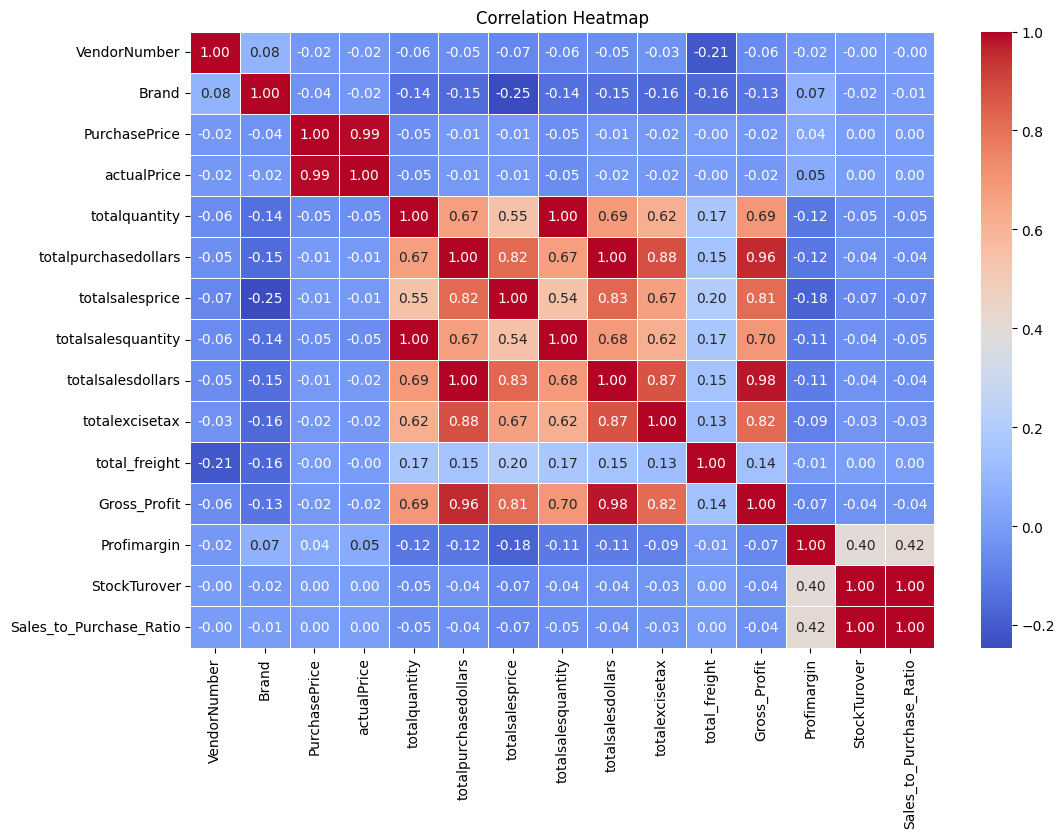

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(Correlation_matrix,annot= True,fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#Profit is driven by sales (r = 0.98) and purchases (r = 0.96), 
# with consistent pricing data (r = 0.99). Freight’s weak correlation (< 0.2) reflects efficient,
#  stable logistics costs supporting healthy vendor performance.

In [21]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

DATA ANALYSIS

Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [22]:

Brand_performance = df.groupby("Description").agg({
    "totalsalesdollars": "sum",
    "Profimargin": "mean"
}).reset_index()



In [23]:
Brand_performance

,Description,totalsalesdollars,Profimargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [24]:
low_sales_threshold = Brand_performance["totalsalesdollars"].quantile(0.15)

In [25]:
High_margin_threshold = Brand_performance["Profimargin"].quantile(0.85)

In [26]:
low_sales_threshold

np.float64(560.299)

In [27]:
High_margin_threshold

np.float64(64.97017552750113)

In [28]:
#Filter Brands with low sales but high profit margin

target_brands = Brand_performance[(Brand_performance["totalsalesdollars"] <= low_sales_threshold) &
(Brand_performance["Profimargin"] >= High_margin_threshold)
]

print("Brands with low sales and high profit margin")
display(target_brands.sort_values("totalsalesdollars"))

Brands with low sales and high profit margin


,Description,totalsalesdollars,Profimargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [29]:
Brand_performance = Brand_performance[Brand_performance['totalsalesdollars']<10000]

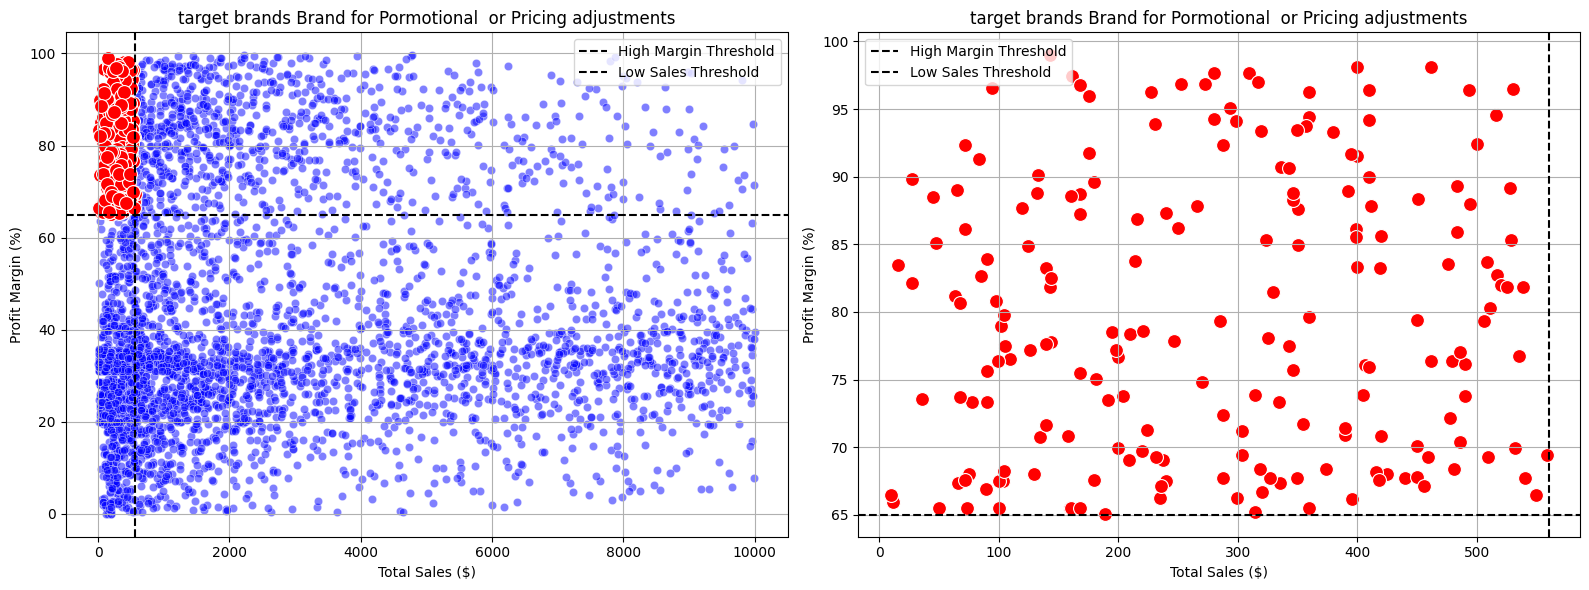

In [30]:


fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot 1: All Brands
sns.scatterplot(
    data=Brand_performance, 
    x='totalsalesdollars', 
    y='Profimargin', 
    color="blue", 
    alpha=0.5, 
    ax=axes[0]
)
sns.scatterplot(
    data=target_brands, 
    x='totalsalesdollars', 
    y='Profimargin', 
    color="red", 
    s=100, 
    ax=axes[0]
)
axes[0].axhline(High_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
axes[0].axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
axes[0].set_title("target brands Brand for Pormotional  or Pricing adjustments")
axes[0].set_xlabel("Total Sales ($)")
axes[0].set_ylabel("Profit Margin (%)")
axes[0].legend()
axes[0].grid(True)


#Plot 2: Target Brands 
sns.scatterplot(
    data=target_brands, 
    x='totalsalesdollars', 
    y='Profimargin', 
    color="red", 
    s=100, 
    ax=axes[1]
)
axes[1].axhline(High_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
axes[1].axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
axes[1].set_title("target brands Brand for Pormotional  or Pricing adjustments")
axes[1].set_xlabel("Total Sales ($)")
axes[1].set_ylabel("Profit Margin (%)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Which vendors and Brands demonstrate the highest sales performance?


In [31]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [32]:
Top_v = pd.read_sql_query("""
    SELECT "VendorName",
           SUM("totalsalesdollars") AS TotalSales
    FROM vendor_sales_summary
    GROUP BY "VendorName"
    ORDER BY TotalSales DESC
    LIMIT 10;
""", conn)

Top_v



,VendorName,totalsales
0,DIAGEO NORTH AMERICA INC,6.873983e+07
1,MARTIGNETTI COMPANIES,4.090521e+07
2,PERNOD RICARD USA,3.227954e+07
3,JIM BEAM BRANDS COMPANY,3.189862e+07
4,BACARDI USA INC,2.500537e+07
5,CONSTELLATION BRANDS INC,2.446713e+07
6,E & J GALLO WINERY,1.855377e+07
7,BROWN-FORMAN CORP,1.847661e+07
8,ULTRA BEVERAGE COMPANY LLP,1.780265e+07
9,M S WALKER INC,1.543607e+07


In [33]:
Top_B = pd.read_sql_query("""
    SELECT "Description",
           SUM("totalsalesdollars") AS TotalSales
    FROM vendor_sales_summary
    GROUP BY  "Description"
    ORDER BY TotalSales DESC
    LIMIT 10;
""", conn)
Top_B

,Description,totalsales
0,Jack Daniels No 7 Black,7964746.76
1,Tito's Handmade Vodka,7399657.58
2,Grey Goose Vodka,7209608.06
3,Capt Morgan Spiced Rum,6356320.62
4,Absolut 80 Proof,6244752.03
5,Jameson Irish Whiskey,5715759.69
6,Ketel One Vodka,5070083.56
7,Baileys Irish Cream,4150122.07
8,Kahlua,3604858.66
9,Tanqueray,3456697.90


In [34]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [35]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/ 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/ 1_000:.2f}K"
    else:
        return str(value)


In [36]:
# Top vendors and Brands by sales performance
top_vendors = df.groupby("VendorName")["totalsalesdollars"].sum().nlargest(10)
top_Brands = df.groupby("Description")["totalsalesdollars"].sum().nlargest(10)

In [37]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: totalsalesdollars, dtype: float64

In [38]:
top_Brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [39]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [40]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: totalsalesdollars, dtype: float64

In [41]:
# Make sure they are DataFrames
top_vendors_df = top_vendors.reset_index()
top_Brands_df = top_Brands.reset_index()

In [42]:
top_Brands.apply(format_dollars)


Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

In [43]:
top_vendors.apply(format_dollars)

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: totalsalesdollars, dtype: object

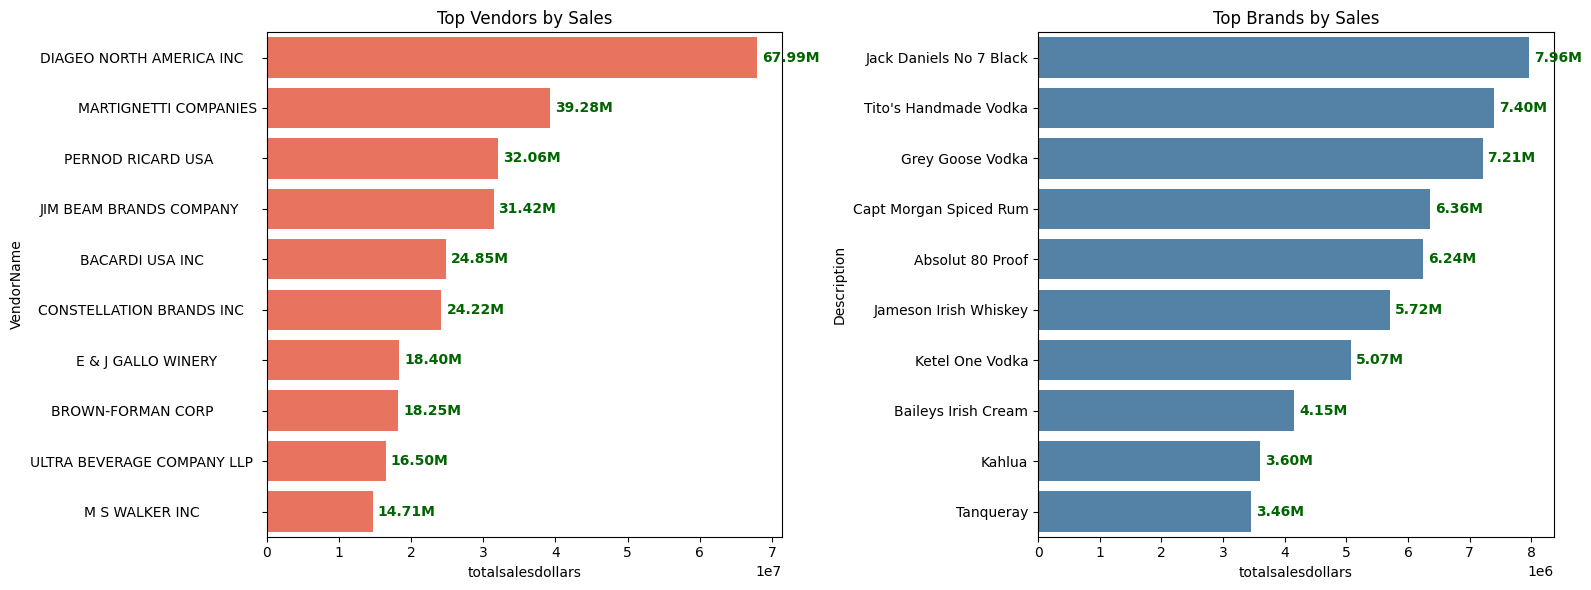

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Vendors ---
sns.barplot(y='VendorName', x='totalsalesdollars', data=top_vendors_df, ax=axes[0], color='tomato')
axes[0].set_xlim(0)
axes[0].set_title("Top Vendors by Sales")
axes[0].tick_params(axis='y', rotation=0)

# Add labels with condition
for p in axes[0].patches:
    value = p.get_width()
    label = format_dollars(value)

    # ✅ Conditional styling
    color = 'darkgreen' if value > 1_000_000 else 'black'
    weight = 'bold' if value > 1_000_000 else 'normal'

    axes[0].text(value + max(top_vendors_df['totalsalesdollars']) * 0.01,
                 p.get_y() + p.get_height() / 2,
                 label,
                 va='center', ha='left', fontsize=10,
                 color=color, fontweight=weight)

# --- Brands ---
sns.barplot(y='Description', x='totalsalesdollars', data=top_Brands_df, ax=axes[1], color='steelblue')
axes[1].set_xlim(0)
axes[1].set_title("Top Brands by Sales")
axes[1].tick_params(axis='y', rotation=0)

# Add labels with same condition
for p in axes[1].patches:
    value = p.get_width()
    label = format_dollars(value)

    color = 'darkgreen' if value > 1_000_000 else 'black'
    weight = 'bold' if value > 1_000_000 else 'normal'

    axes[1].text(value + max(top_Brands_df['totalsalesdollars']) * 0.01,
                 p.get_y() + p.get_height() / 2,
                 label,
                 va='center', ha='left', fontsize=10,
                 color=color, fontweight=weight)

plt.tight_layout()
plt.show()


Which Vendors contribute the most to total purchase dollars?


In [45]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [46]:
 vendor_performance = df.groupby("VendorName").agg({"totalpurchasedollars":'sum',"Gross_Profit":'sum', "totalsalesdollars": "sum"}).reset_index()

In [47]:
vendor_performance

,VendorName,totalpurchasedollars,Gross_Profit,totalsalesdollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [48]:

vendor_performance['PurchaseContribution%'] = (
    vendor_performance['totalpurchasedollars'] / vendor_performance['totalpurchasedollars'].sum()
) * 100


vendor_performance['PurchaseContribution%'] = vendor_performance['PurchaseContribution%']

vendor_performance = vendor_performance.sort_values("PurchaseContribution%",ascending=False).round(2)

In [49]:
vendor_performance.columns

Index(['VendorName', 'totalpurchasedollars', 'Gross_Profit',
       'totalsalesdollars', 'PurchaseContribution%'],
      dtype='object')

In [50]:
#Display top 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors["totalpurchasedollars"] = top_vendors["totalpurchasedollars"].apply(lambda x : format_dollars(x))
top_vendors["Gross_Profit"] = top_vendors["Gross_Profit"].apply(lambda x : format_dollars(x))
top_vendors["totalsalesdollars"] = top_vendors["totalsalesdollars"].apply(lambda x : format_dollars(x))


In [51]:
top_vendors

,VendorName,totalpurchasedollars,Gross_Profit,totalsalesdollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [52]:
vendor_performance.shape

(120, 5)

In [53]:
top_vendors.columns

Index(['VendorName', 'totalpurchasedollars', 'Gross_Profit',
       'totalsalesdollars', 'PurchaseContribution%'],
      dtype='object')

In [54]:
top_vendors["PurchaseContribution%"].sum()

np.float64(65.68)

In [55]:
top_vendors["Cumulative_Contribution"] = top_vendors["PurchaseContribution%"].cumsum().round(2)

In [56]:
top_vendors

,VendorName,totalpurchasedollars,Gross_Profit,totalsalesdollars,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


In [57]:
top_vendors.columns

Index(['VendorName', 'totalpurchasedollars', 'Gross_Profit',
       'totalsalesdollars', 'PurchaseContribution%',
       'Cumulative_Contribution'],
      dtype='object')

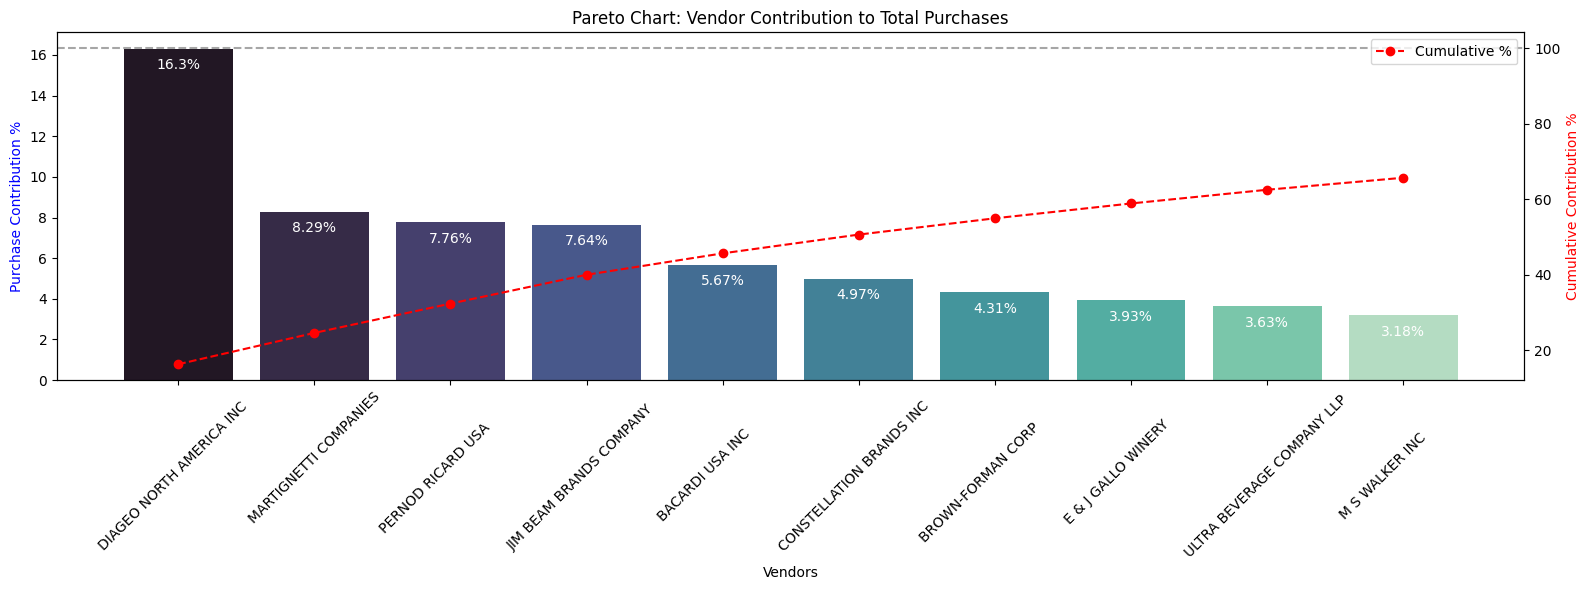

In [58]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for Purchase Contribution %
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors["PurchaseContribution%"],
    palette="mako",
    ax=ax1
)

# Rotate X-axis labels
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value}%", ha='center', fontsize=10, color='white')


ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors["Cumulative_Contribution"], 
         color='red', marker='o', linestyle='--', label='Cumulative %')

# Axis labels and title
ax1.set_xlabel("Vendors")
ax1.set_ylabel("Purchase Contribution %", color='blue')
ax2.set_ylabel("Cumulative Contribution %", color='red')
ax1.set_title("Pareto Chart: Vendor Contribution to Total Purchases")

#  dashed horizontal line at 100%
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

# Legend and layout
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?


In [59]:
print(f"Total Purchase COntribution  of top 10 vendor is {round(top_vendors["PurchaseContribution%"].sum(),2)} %")

Total Purchase COntribution  of top 10 vendor is 65.68 %


In [60]:
total_contribution = top_vendors['PurchaseContribution%'].sum()

In [61]:
remaining = 100 - total_contribution

In [62]:
remaining

np.float64(34.31999999999999)

In [63]:

total_contribution = top_vendors['PurchaseContribution%'].sum()


remaining = 100 - total_contribution

if remaining > 0:
    top_vendors_with_others = pd.concat([
        top_vendors,
        pd.DataFrame({'VendorName': ['Others'], 'PurchaseContribution%': [remaining]})
    ], ignore_index=True)
else:
    top_vendors_with_others = top_vendors.copy()



In [64]:

top_vendors


,VendorName,totalpurchasedollars,Gross_Profit,totalsalesdollars,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


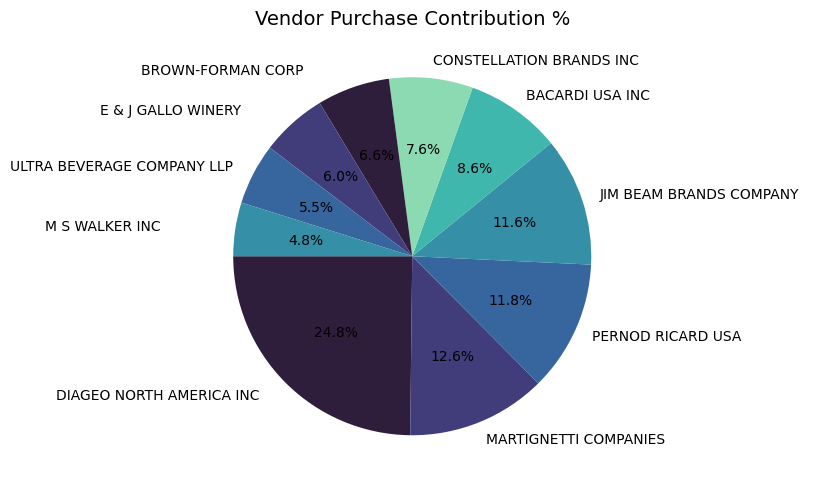

In [65]:
plt.figure(figsize=(8, 8))
plt.pie(top_vendors['PurchaseContribution%'],
        labels=top_vendors['VendorName'],
        colors= sns.color_palette("mako"),
        autopct='%1.1f%%', 
        startangle= 180)


plt.title("Vendor Purchase Contribution %", fontsize=14)
plt.tight_layout()
plt.show()

Does purchasing in bulk the unit price , and what is the optimal price purchase volume for costsaving?

In [66]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio'],
      dtype='object')

In [67]:
df["UnitPurchasePrice"] = df["totalpurchasedollars"]/df["totalquantity"]

In [68]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio,UnitPurchasePrice
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2.0,1.48,0.99,2.0,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,750,4.99,1.0,3.37,4.99,1.0,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712,3.37
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1500,5.29,1.0,3.57,5.29,1.0,5.29,0.22,15919.70,1.72,32.514178,1.000000,1.481793,3.57
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,750,6.29,1.0,4.14,5.79,1.0,5.79,0.11,9.46,1.65,28.497409,1.000000,1.398551,4.14
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,750,5.79,1.0,3.99,5.79,1.0,5.79,0.11,27100.41,1.80,31.088083,1.000000,1.451128,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109.0,3023206.01,545778.28,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682.0,3261197.94,420050.01,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407.0,3418303.68,461140.15,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038.0,3804041.22,561512.37,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19


In [69]:
df["Ordersize"] = pd.qcut(df["totalquantity"],q=3, labels=["Small","Medium","Large"])

In [70]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,actualPrice,totalquantity,totalpurchasedollars,totalsalesprice,totalsalesquantity,totalsalesdollars,totalexcisetax,total_freight,Gross_Profit,Profimargin,StockTurover,Sales_to_Purchase_Ratio,UnitPurchasePrice,Ordersize
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2.0,1.48,0.99,2.0,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,750,4.99,1.0,3.37,4.99,1.0,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712,3.37,Small
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1500,5.29,1.0,3.57,5.29,1.0,5.29,0.22,15919.70,1.72,32.514178,1.000000,1.481793,3.57,Small
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,750,6.29,1.0,4.14,5.79,1.0,5.79,0.11,9.46,1.65,28.497409,1.000000,1.398551,4.14,Small
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,750,5.79,1.0,3.99,5.79,1.0,5.79,0.11,27100.41,1.80,31.088083,1.000000,1.451128,3.99,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109.0,3023206.01,545778.28,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682.0,3261197.94,420050.01,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407.0,3418303.68,461140.15,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038.0,3804041.22,561512.37,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large


In [71]:
df[['Ordersize', 'totalquantity']].sort_values(by='totalquantity', ascending=False)


,Ordersize,totalquantity
8349,Large,337660.0
8243,Large,254824.0
8227,Large,244654.0
8196,Large,226085.0
8553,Large,215668.0
...,...,...
36,Small,1.0
37,Small,1.0
2,Small,1.0
95,Small,1.0


In [72]:
df.groupby('Ordersize')['UnitPurchasePrice'].mean()

Ordersize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

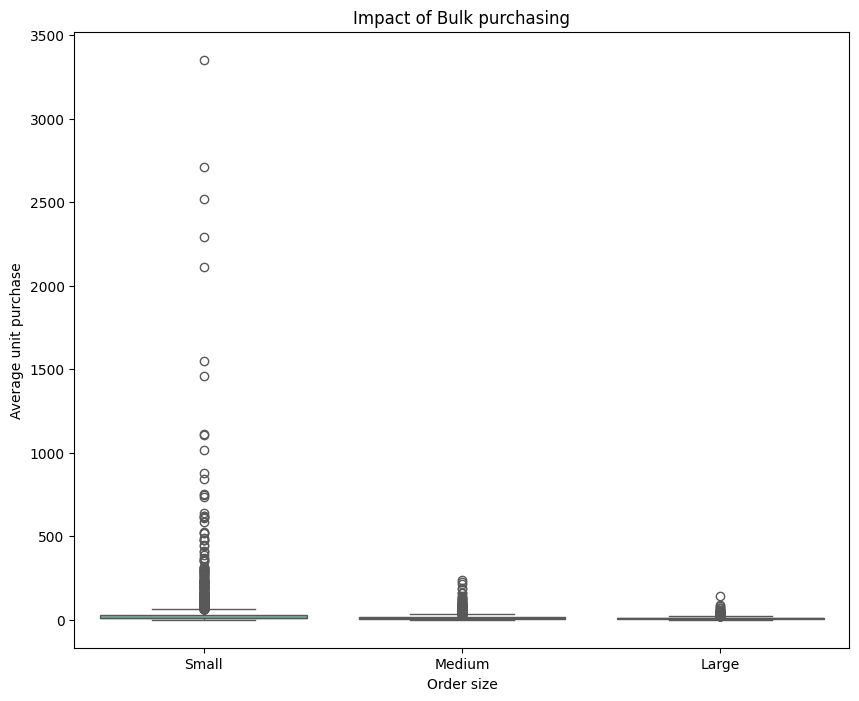

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="Ordersize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk purchasing")
plt.xlabel("Order size")
plt.ylabel("Average unit purchase")
plt.show()

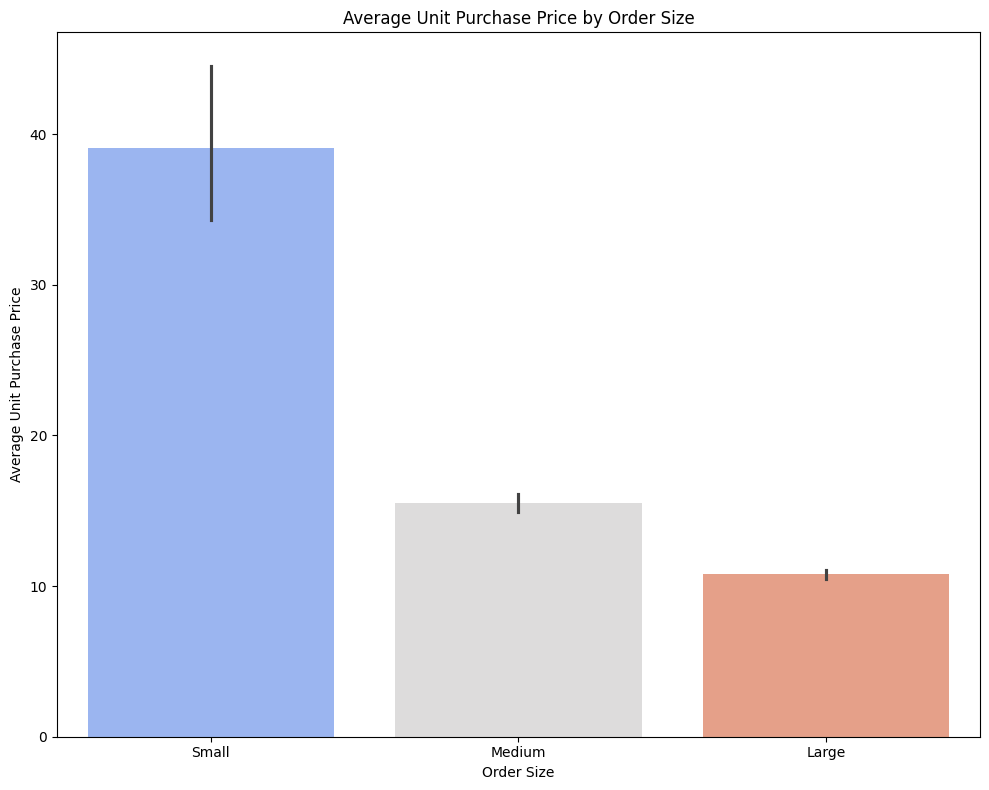

In [74]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="Ordersize", y="UnitPurchasePrice", estimator="mean", palette="coolwarm")
plt.title("Average Unit Purchase Price by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.tight_layout()
plt.show()


In [75]:
#Vendors buying large quanity get lowest unit price meaning higher margins if they can manage inventory efficiently
#Bulk pricing strategy suggest vendor purchasing in bulk leads to higher revenue with even lower margin.

Which vendors have low inventory turnover,indicating excess stock and slow moving stock?


In [76]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio', 'UnitPurchasePrice',
       'Ordersize'],
      dtype='object')

In [77]:
df[df['StockTurover']<1].groupby('VendorName')[['StockTurover']].mean().sort_values(by='StockTurover',ascending=True).head(10)

,StockTurover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much Capital is locked in unsold  ineventory per order, and which vendors contribute the most of it?

In [78]:
df["UnsoldInventoryValue"] = (df['totalquantity'] - df['totalsalesquantity']) * df['PurchasePrice']


In [79]:
total_unsold = df["UnsoldInventoryValue"].sum().round(2)
print("Total Unsold Capital:", format_dollars(total_unsold))

Total Unsold Capital: 2.71M


In [80]:
#Aggregate Capital Locker per vendor
Inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

In [81]:
#Sort Vendors with highest locked capital
Inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index().sort_values(by="UnsoldInventoryValue",ascending=False)

In [82]:
Inventory_value_per_vendor = Inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

In [83]:
Inventory_value_per_vendor.head(10)

25     722.21K
46     554.67K
69     470.63K
117    401.96K
30     228.28K
80     198.44K
11     177.73K
20     133.62K
62     126.48K
78     118.60K
Name: UnsoldInventoryValue, dtype: object

In [84]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'actualPrice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesprice', 'totalsalesquantity', 'totalsalesdollars',
       'totalexcisetax', 'total_freight', 'Gross_Profit', 'Profimargin',
       'StockTurover', 'Sales_to_Purchase_Ratio', 'UnitPurchasePrice',
       'Ordersize', 'UnsoldInventoryValue'],
      dtype='object')

What is the 95% confidence for profit margins of top-performing and low-performing vendors


In [85]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)


In [98]:
top_vendors = df[df['totalsalesdollars'] >= top_threshold]['Profimargin'].dropna()
low_vendors = df[df['totalsalesdollars'] <= low_threshold]['Profimargin'].dropna()

In [99]:
top_vendors

555     56.089315
6424    94.271857
6425    44.614048
6426    38.336474
6427    47.878436
          ...    
8559    28.412764
8560    27.139908
8561    24.675786
8562    21.062810
8563    25.297693
Name: Profimargin, Length: 2141, dtype: float64

In [100]:
low_vendors

0       25.252525
1       32.464930
2       32.514178
3       28.497409
4       31.088083
          ...    
2140    79.358281
2141    79.262717
2142    89.920947
2143    96.320991
2144    31.503500
Name: Profimargin, Length: 2141, dtype: float64

In [101]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors Profit Margin: CI=(30.74, 31.61),Mean=31.18 
Low Vendors Profit Margin: CI=(40.50, 42.64),Mean=41.57 


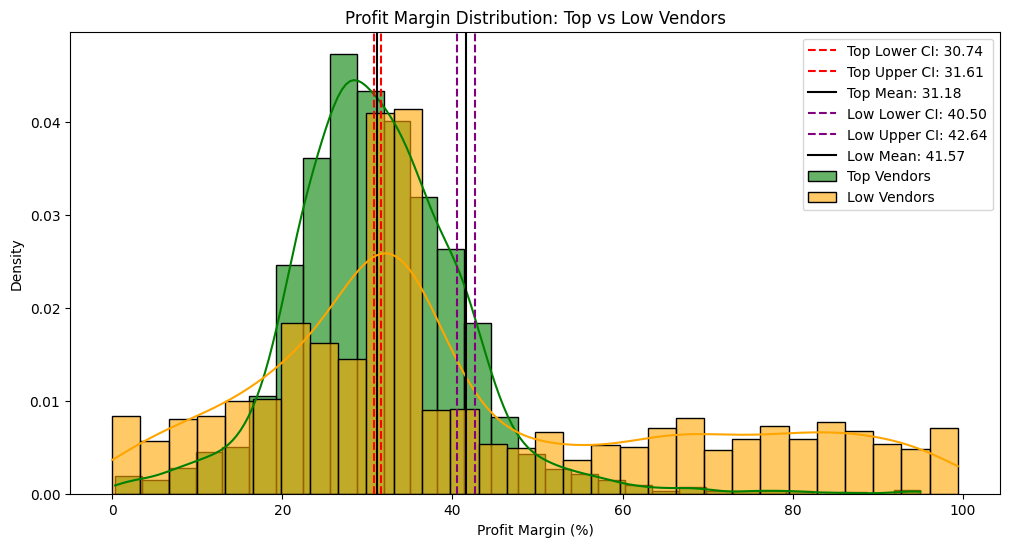

In [103]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors Profit Margin: CI=({top_lower:.2f}, {top_upper:.2f}),Mean={top_mean:.2f} ")
print(f"Low Vendors Profit Margin: CI=({low_lower:.2f}, {low_upper:.2f}),Mean={low_mean:.2f} ")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, color='green', label='Top Vendors', kde=True, stat="density", bins=30, alpha=0.6)
plt.axvline(top_lower, color='red', linestyle='--', label= f"Top Lower CI: {top_lower:.2f}")
plt.axvline(top_upper, color='red', linestyle='--', label= f"Top Upper CI: {top_upper:.2f}")
plt.axvline(top_mean, color='black', linestyle='-', label= f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, color='orange', label='Low Vendors', kde=True, stat="density", bins=30, alpha=0.6)
plt.axvline(low_lower, color='purple', linestyle='--', label= f"Low Lower CI: {low_lower:.2f}")
plt.axvline(low_upper, color='purple', linestyle='--', label= f"Low Upper CI: {low_upper:.2f}")
plt.axvline(low_mean, color='black', linestyle='-', label= f"Low Mean: {low_mean:.2f}")

plt.title("Profit Margin Distribution: Top vs Low Vendors")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Density")
plt.legend()
plt.show()

> The ocnfidence interval for lwo performing vendors is CI=(40.50, 42.64) is significantly higher than then top perfroming vendors CI=(30.74, 31.61)
> Suggest that vendors with low sales tend to maintain high profit margins due to Premium pricing or low operational cost
>For High - performing vendors - If they aim to improve profit they explore selective price adjustments , better marketing to sell more qunatities rather than pricing, Cost-optimization.
> For low - performing vendors - High margins but low sales , If they want to exceed profit from previous levels ,Better marketing strategies, better distribution strategies,Makret and product diversification.

Is there is a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

Ho (Null Hypothesis) : There is significant difference in the mean profit margins of top-performing and low -performing vendors.

H1 (Alternative Hypothesis) : The mean profit margins of top-performing  and low-performing vendors are significantly different 

In [107]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

top_vendors = df[df['totalsalesdollars'] >= top_threshold]['Profimargin'].dropna()
low_vendors = df[df['totalsalesdollars'] <= low_threshold]['Profimargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)
alpha = 0.05
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in profit margins.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit margins.")

T-statistic: -17.6695, P-value: 0.0000
Reject the null hypothesis: Significant difference in profit margins.


In [108]:
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Approximate degrees of freedom for Welch's test
s1, s2 = np.var(top_vendors, ddof=1), np.var(low_vendors, ddof=1)
n1, n2 = len(top_vendors), len(low_vendors)
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

print(f"T-statistic: {t_stat:.4f}, T-critical: {t_critical:.4f}")

if abs(t_stat) > t_critical:
    print("Reject H0: Significant difference in profit margins.")
else:
    print("Fail to reject H0: No significant difference.")

T-statistic: -17.6695, T-critical: 1.9608
Reject H0: Significant difference in profit margins.
